In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import seaborn as sns

In [2]:
# y = ax + b + e
# where epsilon is standard gaussian.
# x is distributed as uniform rv between [0,10].

n = 100
x = np.random.uniform(0, 10, n)

# a be any real number
a = np.random.uniform(0, 4, 1)
b = np.random.uniform(0, 4, 1)
e = np.random.normal(0, 1, n)

y = a * x + b + e

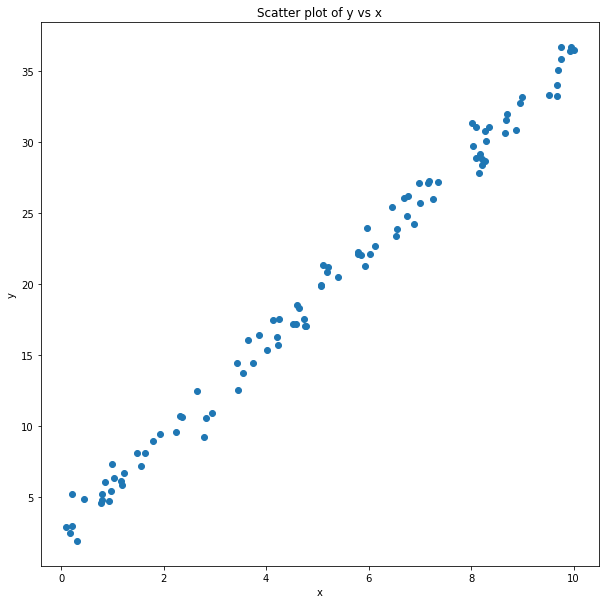

In [3]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [4]:
# normalise the data
x_norm = (x - x.mean()) / x.std()
y_norm = (y - y.mean()) / y.std()


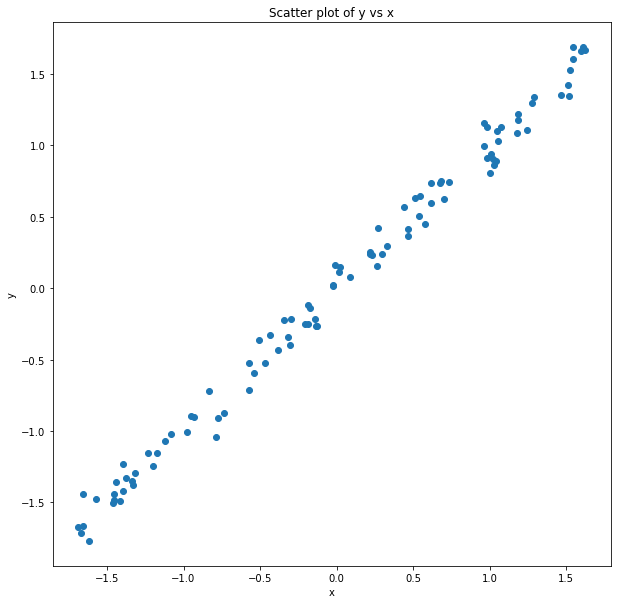

In [5]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))


plt.grid(False)
plt.scatter(x_norm, y_norm)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()

In [6]:
def hypothesis(theta, x):
    '''
    This function calculates the hypothesis function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,)
        The input data.
    
    Returns
    -------
    float
        The output of the hypothesis function.

    '''
    #calculate the hypothesis function using theta and x
    #H(x) = transpose(theta) * x
    #if the length of x is one less than the length of theta then add a column of ones to x to the front
    if len(x) == len(theta) - 1:
        #print(len(x), len(theta))
        x = np.insert(x, 0, 1)
    return np.dot(theta, x)

In [7]:
def cost_function(theta, x, y):
    '''
    This function calculates the cost function

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    
    Returns
    -------
    float
        The output of the cost function.

    '''
    cost=0
    
    
    for i in range(len(y)):
        cost += (hypothesis(theta, x[i]) - y[i])**2

   # print("cost = ",cost/2*(len(y)))
    return cost/2*(len(y))

In [8]:
def batch_gradient_descent(theta, x, y, alpha, iterations,epsilon):
    '''
    This function calculates the gradient descent

    Parameters
    ----------
    theta : array-like of shape (n,)
        The coefficients of the linear regression model.
    x : array-like of shape (n,m)
        The input data.
    y : array-like of shape (n,)
        The target data.
    alpha : float
        The learning rate.
    iterations : int
        The number of iterations.
    
    Returns
    -------
    array-like of shape (n,)
        The output of the gradient descent.

    '''
    #calculate the gradient descent
    #store all the values of theta in a list and corresponding cost in another list
    theta_list = []
    cost_list = []
    #repeat until convergence
    print(theta,"cost is",cost_function(theta, x, y))
    theta_list.append(theta)
    cost_list.append(cost_function(theta, x, y))
    for i in range(iterations):
        # if i > 0 and i%100 == 0:
        #     print(i)
        temp_theta = theta.copy()
        for j in range(len(theta)):
            temp=0
            for k in range(len(y)):
                temp+=(hypothesis(theta, x[k]) - y[k])*x[k][j]
            # theta[j] = theta[j] - alpha*(1/(len(y)))*temp
            temp_theta[j] = temp_theta[j] - alpha*(1/(len(y)))*temp
        theta = temp_theta.copy()
        #compare current loss with previous loss if loss is not decreasing then break
        print(theta,"cost is",cost_function(theta, x, y))
        theta_list.append(theta)
        cost_list.append(cost_function(theta, x, y))
        if i>0:
            if cost_list[i-1]-cost_list[i] < epsilon:
                break
        

    return theta, theta_list, cost_list

In [9]:
def augment (X, d, aug_intercept = False):
    if aug_intercept:
        X = np.c_[np.ones(len(X)), X]
    for i in range(2,d+1):
        X = np.c_[X, np.power(X[:,1],i)]

    return X

In [10]:
X_aug_2 = augment(x_norm, 2, aug_intercept = True)
X_aug_5 = augment(x_norm, 5, aug_intercept = True)
X_aug_10 = augment(x_norm, 10, aug_intercept = True)

In [11]:
print(X_aug_2[0])
print(X_aug_5[0])
print(X_aug_10[0])

[1.         1.27396511 1.6229871 ]
[1.         1.27396511 1.6229871  2.06762894 2.63408713 3.3557351 ]
[ 1.          1.27396511  1.6229871   2.06762894  2.63408713  3.3557351
  4.27508943  5.44631478  6.93841501  8.83929863 11.26095805]


In [12]:
theta02 = np.zeros(len(X_aug_2[0]))
theta05 = np.zeros(len(X_aug_5[0]))
theta10 = np.zeros(len(X_aug_10[0]))


In [13]:
theta2, theta_list2, cost_list2 = batch_gradient_descent(theta02, X_aug_2, y_norm, alpha = 0.01, iterations = 1000, epsilon = 0.0001)

[0. 0. 0.] cost is 4999.999999999998
[-9.40914013e-19  9.95430857e-03 -1.00537541e-03] cost is 4900.415746937618
[ 1.00537541e-05  1.98080450e-02 -1.98245722e-03] cost is 4802.86866857488
[ 2.97777887e-05  2.95622440e-02 -2.93195844e-03] cost is 4707.3154628455695
[ 5.87995952e-05  3.92179292e-02 -3.85457431e-03] cost is 4613.7138251135575
[ 9.67573424e-05  4.87761131e-02 -4.75098281e-03] cost is 4522.022421667584
[ 0.0001433   0.0582378  -0.00562185] cost is 4432.20086406979
[ 0.00019809  0.06760397 -0.00646781] cost is 4344.20968432516
[ 0.00026078  0.07687562 -0.00728949] cost is 4258.010310840236
[ 0.00033107  0.08605371 -0.00808752] cost is 4173.5650451409665
[ 0.00040863  0.09513921 -0.00886249] cost is 4090.8370393207797
[ 0.00049317  0.10413305 -0.00961497] cost is 4009.7902741913053
[ 0.00058439  0.11303619 -0.01034555] cost is 3930.3895381092984
[ 0.000682    0.12184955 -0.01105476] cost is 3852.6004064544436
[ 0.00078573  0.13057405 -0.01174317] cost is 3776.38922173388
[ 0.

In [14]:
prediction2 = hypothesis(theta2, X_aug_2)

ValueError: shapes (3,) and (100,3) not aligned: 3 (dim 0) != 100 (dim 0)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/divyansh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3437, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-93-cdd0c75d2923>", line 6, in <module>
    plt.plot(x_norm, prediction2, color = 'red')
NameError: name 'prediction2' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/divyansh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2061, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/Users/divyansh/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context

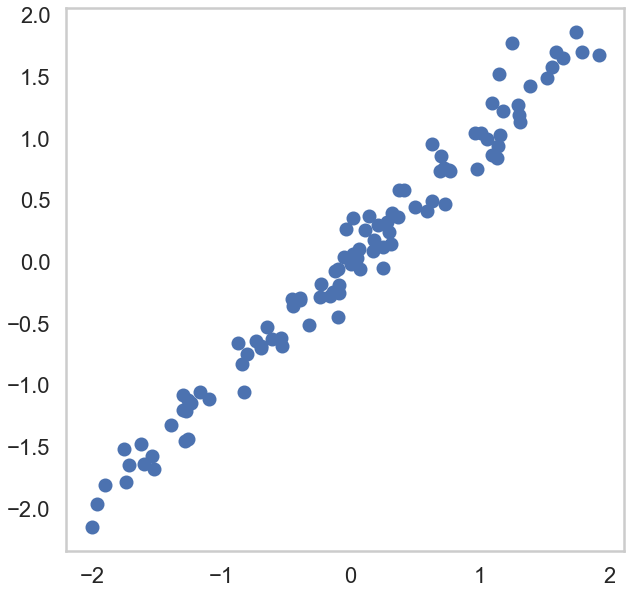

In [ ]:
# plot the data
# figure size (width, height)
fig = plt.figure(figsize=(10, 10))
plt.grid(False)
plt.scatter(x_norm, y_norm)
plt.plot(x_norm, prediction2, color = 'red')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Scatter plot of y vs x")
plt.show()
